In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
import re

#### Load game_details dataset

In [63]:
games_details = pd.read_csv('raw_data/games_details.csv')

/Users/biagiolicari/miniforge3/envs/workspace/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
def dataset_overview(df, df_name):
    display(Markdown(f'### {df_name} dataset overview'))
    display(Markdown(f'dataset shape : {df.shape}'))
    display(Markdown(f'#### Display 5 first rows'))
    display(df.head())
    display(Markdown('*****'))
    display(Markdown(f'#### Describe dataset'))
    display(df.describe().T)
    display(Markdown('*****'))
    display(Markdown(f'#### Missing values'))
    print_missing_values(df)

In [65]:
def print_missing_values(df):
    df_null = pd.DataFrame(len(df) - df.notnull().sum(), columns = ['Count'])
    df_null = df_null[df_null['Count'] > 0].sort_values(by='Count', ascending=False)
    df_null = df_null/len(df)*100

    if len(df_null) == 0:
        display(Markdown('No missing value.'))
        return

    x = df_null.index.values
    height = [e[0] for e in df_null.values]

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.bar(x, height, width=0.8)
    plt.xticks(x, x, rotation=60)
    plt.xlabel('Columns')
    plt.ylabel('Percentage')
    plt.title('Percentage of missing values in columns')
    plt.show()

### Games Details dataset overview

dataset shape : (626111, 29)

#### Display 5 first rows

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


*****

#### Describe dataset

,count,mean,std,min,25%,50%,75%,max
GAME_ID,626111.0,2.164553e+07,5.656110e+06,1.030000e+07,2.060092e+07,2.120022e+07,2.170020e+07,5.200021e+07
TEAM_ID,626111.0,1.610613e+09,8.649604e+00,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
PLAYER_ID,626111.0,3.451868e+05,7.461713e+06,1.500000e+01,2.419000e+03,2.011440e+05,2.030920e+05,1.962938e+09
FGM,523751.0,3.574498e+00,3.019116e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.800000e+01
FGA,523751.0,7.878062e+00,5.657840e+00,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,5.000000e+01
FG_PCT,523751.0,4.158431e-01,2.516357e-01,0.000000e+00,2.500000e-01,4.290000e-01,5.710000e-01,1.000000e+00
FG3M,523751.0,7.530506e-01,1.205652e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01
FG3A,523751.0,2.115030e+00,2.521680e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.400000e+01
FG3_PCT,523751.0,1.974271e-01,2.892926e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e-01,1.000000e+00
FTM,523751.0,1.738716e+00,2.356272e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.600000e+01


*****

#### Missing values

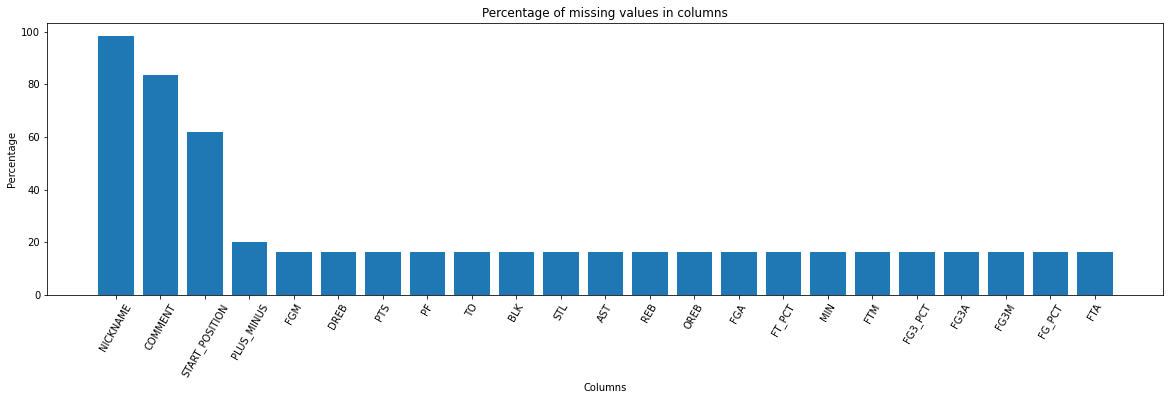

In [66]:
dataset_overview(games_details, 'Games Details')

In [67]:
print(games_details.shape)

(626111, 29)


In [68]:
# Clean player details
# right join btw games details and games on key GAMES_ID to exclude season < 2010
games = pd.read_csv('curated_data/games.csv')
games_details = games_details.merge(games[['GAME_ID', 'SEASON']], on='GAME_ID')
print(games_details.shape)

(360582, 30)


In [69]:
# Drop some not useful colums
cols_name = ['NICKNAME', 'COMMENT', 'SEASON']
games_details.drop(labels=cols_name, axis=1, inplace=True)
games_details.drop_duplicates(subset=['GAME_ID', 'TEAM_ID', 'PLAYER_ID'],inplace=True)
games_details.reset_index(inplace=True, drop=True)

In [70]:
# If the player is on the bench, column 'START POSITION' has a NaN value
games_details[games_details['START_POSITION'].isna()].shape

(218808, 27)

In [71]:
# Fill NaN value of START_POSITION with B value
games_details['START_POSITION'] = games_details['START_POSITION'].fillna('B')

In [72]:
# Function to convert str in format Minutes:Seconds to number
# Formula = x𝑚𝑖𝑛+y𝑠*1𝑚𝑖𝑛/60𝑠
def convert_datetime_to_decimal(datetime, splitter=':') :
    datetime_list = [float(i) for i in str(datetime).split(splitter)]
    return (datetime_list[0] + (datetime_list[1] * 1/60)) if len(datetime_list) == 2 else datetime_list[0]

# Apply convert_datetime_to_decimal to MIN columns of dataframe
games_details['MIN'] = games_details['MIN'].apply(lambda datetime : convert_datetime_to_decimal(datetime))

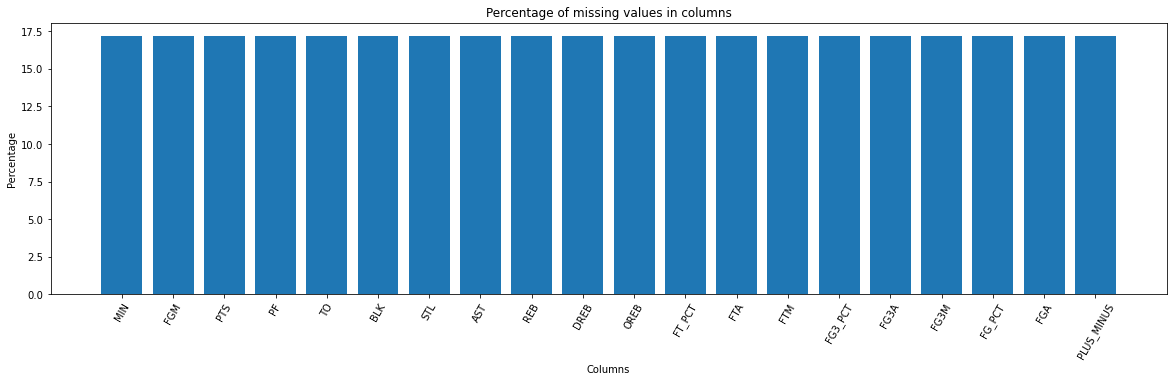

In [73]:
print_missing_values(games_details)

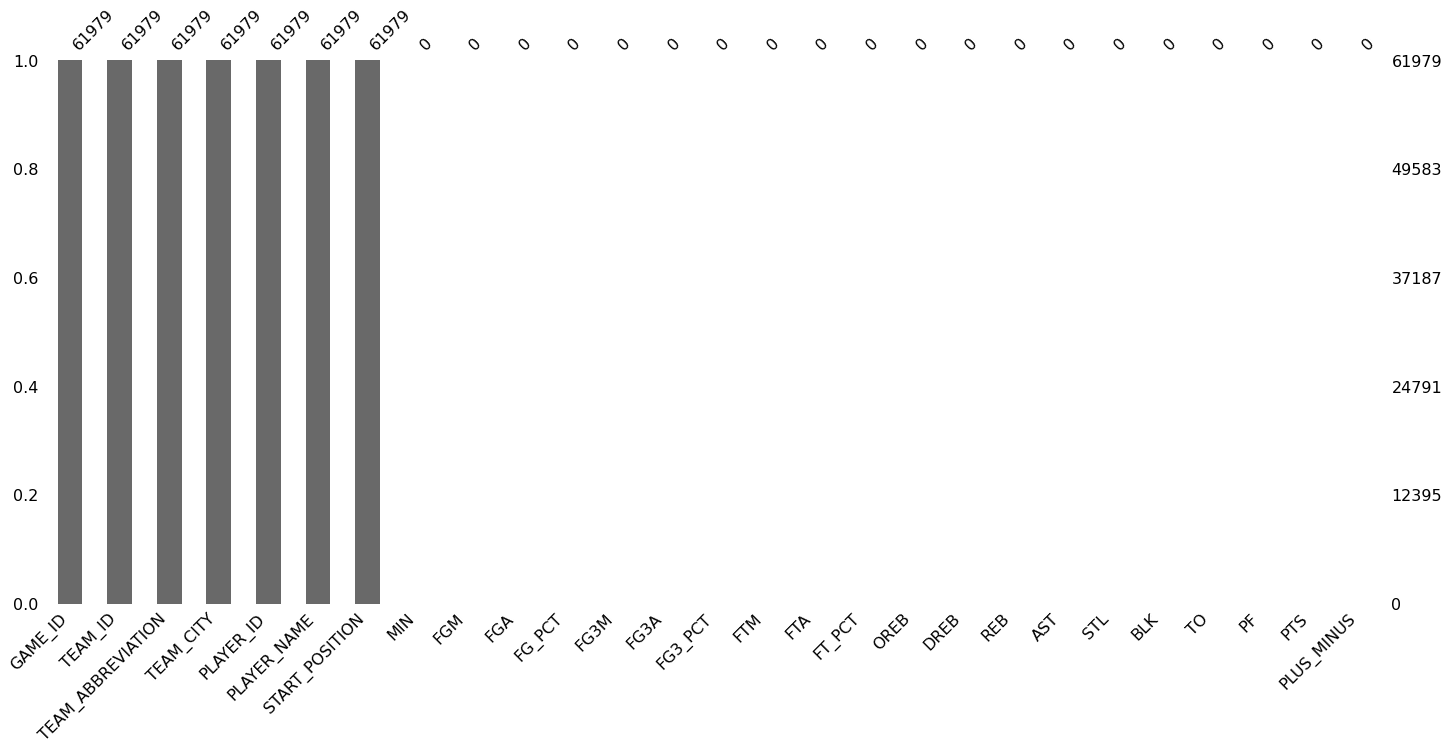

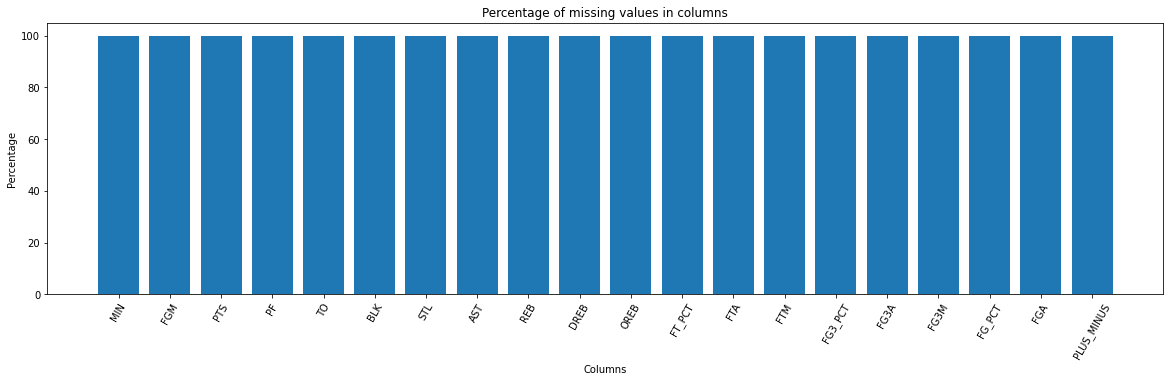

In [74]:
games_details_nan = games_details[games_details.isna().any(axis=1)]
msno.bar(games_details_nan)
print_missing_values(games_details_nan)
# As we can see, in the dataset, if a stats per player is NaN the rest of feature are also not present
# Due to this reason, the rows will be deleted because are unuseful

In [75]:
# delete rows that have a tresh > 19 of NaN values
# the tresh > 19 rapresent that if more than 19 columns have NaN, they are deleted
games_details.dropna(axis=0, thresh=19, inplace=True)
games_details.reset_index(inplace=True, drop=True)

In [76]:
# plot missing value %
print_missing_values(games_details)


No missing value.

In [77]:
print_missing_values(games_details)

No missing value.

In [92]:
games_details = games_details[games_details['MIN'] >= 15].copy()

#### Add some new interesting features to the dataset

In [93]:
# https://www.breakthroughbasketball.com/stats/definitions.html
# FG2M : the number of 2 point shots made
games_details['FG2M'] = games_details['FGM'] - games_details['FG3M']

In [94]:
# FG2A : the number of 2 point shots attempted
games_details['FG2A'] = games_details['FGA'] - games_details['FG3A']

In [95]:
# EFG% – the Effective Field Goal percentage
games_details['EFG'] = (games_details['FGM'] + (0.5*games_details['FG3M']))/games_details['FGA']

In [96]:
# FG_MISSED : field goal missed
games_details['FG_MISSED'] = games_details['FGA'] - games_details['FGM']
# FT_MISSED : field throw missed
games_details['FT_MISSED'] = games_details['FTA'] - games_details['FTM']

In [97]:
# EFFICACY a measure of a player's efficiency, Effic = Pts + Rebs + Ast + Stl + Blk – (TO + FG Misses + FT Misses)
games_details['EFFICACY'] = games_details['PTS']\
                        + games_details['REB']\
                        + games_details['AST']\
                        + games_details['STL']\
                        + games_details['BLK']\
                        - (games_details['TO'] + games_details['FG_MISSED'] + games_details['FT_MISSED'])

In [98]:
# POSS = (FG2A + FG3A) + 0.44 × FTA − OREB + TO
games_details['POSS'] = (games_details['FG2A'] + games_details['FG3A']) + 0.44 * games_details['FTA'] \
                        - games_details['OREB'] + games_details['TO']

In [99]:
# PACE : pace of the game per player
# PACE = 5 × POSS/MIN
games_details['PACE'] = 5 * games_details['POSS'] / games_details['MIN']

In [100]:
# PIE : Player Efficiency Stats
# http://www.rustylarue.com/more-than-94rsquo/player-efficiency-stats
# (2FG Made*2) - (2FG Attempted*.75) + (3FG Made*3) – (3FG Attempted*.84) + (FT Made)
# - (FT Attempted*-.65) + Rebounds + Assists + Blocks + Steals - Turnovers
games_details['PIE'] = (games_details['FG2M']*2) - (games_details['FG2A'] * .75) + (games_details['FG3M'] * 3) \
                       - (games_details['FG3A'] * .84) + games_details['FTM'] - (games_details['FTA'] * .65) \
                       + games_details['REB'] + games_details['AST'] + games_details['BLK'] + games_details['STL'] \
                       - games_details['TO']

In [101]:
games_details.head(15)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,...,PLUS_MINUS,FG2M,FG2A,EFG,FG_MISSED,FT_MISSED,EFFICACY,POSS,PACE,PIE
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,F,27.683333,1.0,6.0,...,2.0,1.0,1.0,0.166667,5.0,0.0,6.0,6.44,1.163155,5.40
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,F,30.466667,2.0,12.0,...,-14.0,1.0,4.0,0.208333,10.0,0.0,5.0,12.00,1.969365,5.28
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,C,24.350000,9.0,12.0,...,-2.0,9.0,12.0,0.750000,3.0,3.0,26.0,13.20,2.710472,19.75
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,G,35.116667,9.0,20.0,...,-9.0,4.0,9.0,0.575000,11.0,0.0,23.0,22.44,3.195064,17.36
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,G,28.566667,0.0,5.0,...,-5.0,0.0,1.0,0.000000,5.0,0.0,-2.0,7.00,1.225204,-1.11
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,B,17.983333,1.0,6.0,...,-8.0,1.0,4.0,0.166667,5.0,0.0,-3.0,9.00,2.502317,-2.68
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,B,22.200000,6.0,9.0,...,-11.0,6.0,9.0,0.666667,3.0,0.0,24.0,5.32,1.198198,18.30
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,B,24.983333,2.0,9.0,...,-10.0,1.0,2.0,0.277778,7.0,0.0,14.0,8.76,1.753169,11.02
13,22100213,1610612766,CHA,Charlotte,202330,Gordon Hayward,F,25.250000,4.0,14.0,...,-7.0,4.0,11.0,0.285714,10.0,0.0,5.0,14.00,2.772277,4.23
14,22100213,1610612766,CHA,Charlotte,1628970,Miles Bridges,F,37.383333,8.0,15.0,...,15.0,7.0,11.0,0.566667,7.0,1.0,21.0,18.44,2.466340,16.74


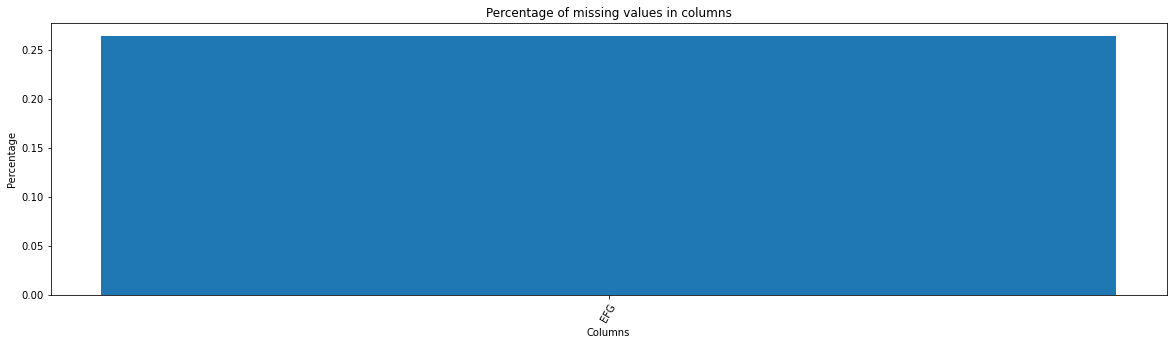

In [102]:
print_missing_values(games_details)

In [103]:
# Replace EFG NaN value with 0.0
games_details['EFG'].fillna(value=0.0, inplace=True)

In [104]:
#Save the actual datafram to new csv file
games_details.to_csv('curated_data/games_details.csv', index=False)

#### Create a new dataframe with the avg perfomance per match of players

In [105]:
# check equal size
games_details['GAME_ID'].unique().size == games['GAME_ID'].unique().size

True

In [111]:
# Group DF by Game ID, Team ID and Team Name and get AVG stats
games_details_avg = games_details.groupby(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION'], as_index=False).mean()
games_details_avg.drop(['PLAYER_ID', 'TEAM_ABBREVIATION'], axis=1, inplace=True)

In [114]:
games_details_avg = games_details_avg.round(3)
games_details_avg

,GAME_ID,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,PLUS_MINUS,FG2M,FG2A,EFG,FG_MISSED,FT_MISSED,EFFICACY,POSS,PACE,PIE
0,11900101,1610612746,19.238,3.400,7.600,0.452,1.600,4.100,0.352,1.200,...,4.300,1.800,3.500,0.556,4.200,0.300,10.900,8.360,2.209,8.356
1,11900101,1610612753,18.621,3.250,7.625,0.337,0.625,3.000,0.133,2.125,...,-5.250,2.625,4.625,0.368,4.375,0.375,9.000,9.475,2.537,6.136
2,11900102,1610612743,25.000,3.500,7.875,0.541,1.250,3.875,0.253,2.875,...,4.375,2.250,4.000,0.603,4.375,0.625,12.500,11.290,2.129,8.970
3,11900102,1610612764,21.417,3.500,8.875,0.413,1.125,3.375,0.351,1.375,...,-2.875,2.375,5.500,0.501,5.375,0.625,9.125,10.005,2.296,6.865
4,11900103,1610612740,18.100,2.571,6.429,0.368,0.857,2.714,0.248,0.571,...,12.143,1.714,3.714,0.435,3.857,0.286,8.857,7.520,2.030,7.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28285,52000131,1610612763,34.292,6.167,13.167,0.467,1.000,2.833,0.317,2.167,...,14.667,5.167,10.333,0.520,7.000,1.500,19.333,14.113,1.941,15.320
28286,52000201,1610612754,25.204,4.500,11.375,0.362,1.625,4.750,0.268,0.500,...,-17.125,2.875,6.625,0.419,6.875,0.250,11.250,12.080,2.297,8.929
28287,52000201,1610612764,24.406,5.250,9.000,0.608,1.250,2.625,0.259,2.375,...,18.625,4.000,6.375,0.672,3.750,0.750,18.000,11.625,2.295,13.482
28288,52000211,1610612744,36.614,5.714,12.857,0.493,1.714,4.571,0.350,2.286,...,-1.571,4.000,8.286,0.544,7.143,0.571,17.857,15.543,1.936,13.660


In [115]:
#Save this new dataframe
games_details_avg.to_csv('curated_data/game_details_avg.csv', index=False)

#### Let's do some plot

<AxesSubplot:>

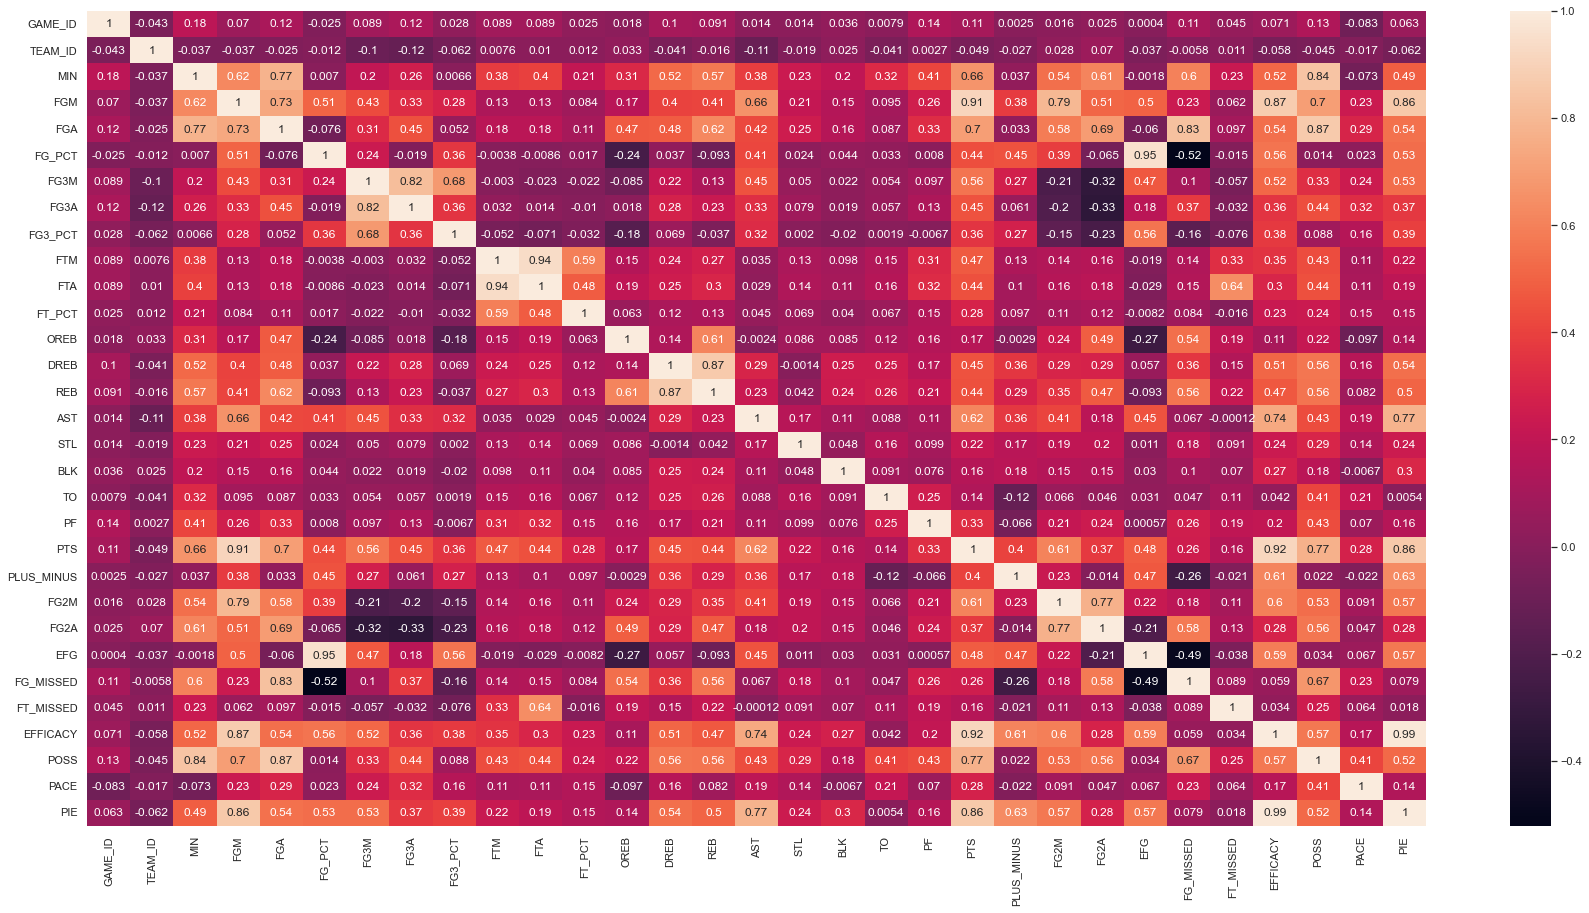

In [123]:
#Correlation Plot
corr_matrix = games_details_avg.corr()
sns.set(rc={'figure.figsize':(30,15)})
sns.heatmap(corr_matrix, annot=True)